## World Energy Distribution Robot

This Project offers a holistic view of World Energy using data from [Our World in Energy](https://ourworldindata.org/energy). The dataset used in this analysis covers 1900 to 2021 period and consists of over a hundred columns containing data in respect of different forms of renewable and non-renewable energy, including figures on energy-electricity contribution in multiple countries.

The scope of this analysis has been generally restricted to not earlier than 1950, with maximum 26 columns of interest. In addition, please note that only the underlisted countries (in no particular order) have been considered in this project:

* United States
* United Kingdom
* Australia
* Germany
* Ireland
* Russia
* Nigeria
* Japan
* India

Please feel free to include any additional country of interest in ln(3) below for access to its energy information.

Finally, upon attempting to run this bot on your system, please ensure that no inputs are incorrectly captured in order to avoid unsolicited error.

In [1]:
#Importing necessary Libraries

import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import datetime as dt

from bokeh.plotting import figure, show
from bokeh.models import HoverTool

import scipy
from scipy import stats
from scipy.stats.stats import pearsonr

In [2]:
%matplotlib inline

In [3]:
#Loading up the world energy data and defining columns, years and countries of interest

Energy = pd.read_csv('World-energy-data.csv')
Energy = Energy[['country','year','population','gdp','coal_production','oil_production','gas_production',
                 'electricity_generation','biofuel_electricity','coal_electricity','fossil_electricity','gas_electricity',
                 'hydro_electricity','nuclear_electricity','oil_electricity','renewables_electricity','solar_electricity',
                 'wind_electricity','energy_per_gdp','energy_per_capita',
                 'gas_consumption','hydro_consumption','nuclear_consumption','oil_consumption','solar_consumption',
                 'wind_consumption']]

Energy = Energy[Energy['year'] >= 1950]

Target_countries = ['United States','United Kingdom','Australia','Russia','Germany','Japan','Ireland','India','Nigeria']

Energy = Energy.loc[Energy['country'].isin(Target_countries)]

Energy.head()

,country,year,population,gdp,coal_production,oil_production,gas_production,electricity_generation,biofuel_electricity,coal_electricity,...,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,gas_consumption,hydro_consumption,nuclear_consumption,oil_consumption,solar_consumption,wind_consumption
1020,Australia,1950,8177348.0,9.767859e+10,129.300,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,Australia,1951,8398224.0,1.018378e+11,137.743,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,Australia,1952,8595064.0,1.027649e+11,150.362,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,Australia,1953,8782177.0,1.059673e+11,143.555,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1024,Australia,1954,8970121.0,1.125660e+11,154.722,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Checking for missing data on a column by column basis
Energy.isnull().sum()

country                     0
year                        0
population                  0
gdp                        26
coal_production            16
oil_production             50
gas_production             16
electricity_generation    295
biofuel_electricity       385
coal_electricity          300
fossil_electricity        300
gas_electricity           300
hydro_electricity         155
nuclear_electricity       155
oil_electricity           300
renewables_electricity    156
solar_electricity         155
wind_electricity          155
energy_per_gdp            161
energy_per_capita         144
gas_consumption           184
hydro_consumption         184
nuclear_consumption       184
oil_consumption           184
solar_consumption         184
wind_consumption          184
dtype: int64

## Data Cleaning

To ensure data is adequately and properly cleaned, there is need to understand the nature of data in the specific columns and the position of the residing missing values.

In the next few lines, I attempt to assess the position of the missing **'gdp'** values. As seen below, given that 'gdp' values are only missing for the years 2019 to 2021 per individual countries, it would be safe to 'forward-fill' (ffill) with 2018 values on the assumption that the values will typically not differ by a great margin per country.

In the same vein, I assumed that the missing values in other columns are simply unavailable. Hence, these were zeroed. Observe that using ffill or backward-fill(bfill) will result in potential spills between countries which would be incorrect for our analysis.

In [5]:
nulls = Energy['gdp'].isnull().sum()
nulls

26

In [6]:
#missing gdp values observed only between 2019 and 2021 per country
gdp_NaN = pd.isnull(Energy['gdp'])
Energy[gdp_NaN]

,country,year,population,gdp,coal_production,oil_production,gas_production,electricity_generation,biofuel_electricity,coal_electricity,...,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,gas_consumption,hydro_consumption,nuclear_consumption,oil_consumption,solar_consumption,wind_consumption
1089,Australia,2019,2.520320e+07,NaN,3669.878,224.077,1431.490,250.26,3.28,141.72,...,14.85,17.71,NaN,64774.684,420.910,34.949,0.000,585.704,45.307,48.216
1090,Australia,2020,2.549988e+07,NaN,3451.009,228.627,1425.160,243.44,3.12,130.94,...,21.03,20.40,NaN,60660.293,408.986,35.859,0.000,508.277,58.823,55.774
1091,Australia,2021,2.578822e+07,NaN,NaN,NaN,NaN,247.06,3.12,125.53,...,29.12,24.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6195,Germany,2019,8.351705e+07,NaN,330.528,NaN,53.308,599.49,50.13,171.45,...,44.38,125.89,NaN,43408.366,886.871,50.001,185.893,1294.737,114.877,311.741
6196,Germany,2020,8.378394e+07,NaN,272.000,NaN,44.973,564.52,50.86,133.58,...,48.64,132.10,NaN,40152.984,865.455,45.970,158.814,1169.140,124.836,323.107
6197,Germany,2021,8.390047e+07,NaN,NaN,NaN,NaN,573.71,50.58,165.32,...,49.41,115.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7371,India,2019,1.366418e+09,NaN,3499.012,437.491,269.060,1603.48,29.67,1184.53,...,46.27,63.31,NaN,6889.742,592.503,401.185,111.833,2774.393,114.569,156.780
7372,India,2020,1.380004e+09,NaN,3522.966,408.768,237.606,1560.33,32.10,1125.22,...,58.68,60.43,NaN,6437.936,596.008,403.720,110.066,2505.896,144.779,149.082
7373,India,2021,1.393409e+09,NaN,NaN,NaN,NaN,1696.80,33.01,1250.46,...,68.34,68.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7856,Ireland,2019,4.882498e+06,NaN,NaN,NaN,NaN,30.72,0.85,0.51,...,0.04,10.02,NaN,37730.270,53.159,2.195,0.000,87.972,0.053,24.810


In [7]:
#Checking 2018 gdp values ok

u_2018 = Energy[Energy['year'] ==2018]
u_2018

,country,year,population,gdp,coal_production,oil_production,gas_production,electricity_generation,biofuel_electricity,coal_electricity,...,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,gas_consumption,hydro_consumption,nuclear_consumption,oil_consumption,solar_consumption,wind_consumption
1088,Australia,2018,2.489815e+07,1.238560e+12,3636.380,170.883,1260.158,247.82,3.43,149.61,...,9.93,15.16,1.278,63560.204,358.262,43.092,0.000,590.744,30.651,40.417
6194,Germany,2018,8.312442e+07,3.885961e+12,439.408,NaN,55.418,632.72,50.79,228.16,...,43.46,109.95,0.960,44898.769,858.507,44.675,188.901,1286.683,113.791,273.270
7370,India,2018,1.352642e+09,8.835758e+12,3555.345,459.939,274.929,1578.98,27.22,1198.86,...,36.33,60.31,1.042,6805.087,580.899,347.340,97.056,2688.035,90.297,149.896
7855,Ireland,2018,4.818694e+06,3.143217e+11,NaN,NaN,NaN,30.90,0.85,2.15,...,0.02,8.64,0.587,38309.863,52.105,1.725,0.000,88.958,0.041,21.473
8261,Japan,2018,1.272022e+08,4.867010e+12,6.715,NaN,NaN,983.29,28.77,300.25,...,62.67,7.48,1.073,41064.023,1157.082,201.581,122.048,2105.896,154.378,16.018
11294,Nigeria,2018,1.958747e+08,1.060806e+12,NaN,1120.678,482.696,30.56,0.02,0.59,...,0.03,0.00,0.457,2475.821,NaN,NaN,NaN,NaN,NaN,NaN
13066,Russia,2018,1.457340e+08,3.613411e+12,2562.787,6604.501,6691.130,1045.68,0.48,167.77,...,0.72,0.23,2.314,57383.015,4544.993,473.807,508.462,1822.919,1.552,0.589
16057,United Kingdom,2018,6.714168e+07,2.540210e+12,20.497,591.623,407.154,330.50,34.93,16.83,...,12.74,56.91,0.869,32878.001,795.400,13.530,161.709,873.770,31.653,141.434
16179,United States,2018,3.270963e+08,1.814065e+13,4277.451,7794.890,8409.362,4198.83,61.83,1149.49,...,93.36,272.67,1.464,81218.395,8217.150,719.554,2111.488,10317.512,234.392,684.528


In [8]:
#ffill'ing missing gdp values and checking to ensure no missing gdp value

Energy['gdp'].ffill(inplace = True)
Energy.isnull().sum()

country                     0
year                        0
population                  0
gdp                         0
coal_production            16
oil_production             50
gas_production             16
electricity_generation    295
biofuel_electricity       385
coal_electricity          300
fossil_electricity        300
gas_electricity           300
hydro_electricity         155
nuclear_electricity       155
oil_electricity           300
renewables_electricity    156
solar_electricity         155
wind_electricity          155
energy_per_gdp            161
energy_per_capita         144
gas_consumption           184
hydro_consumption         184
nuclear_consumption       184
oil_consumption           184
solar_consumption         184
wind_consumption          184
dtype: int64

In [9]:
#filling other missing values as described above

Energy = Energy.fillna(0)
pd.set_option('display.max_rows', None)
Energy

,country,year,population,gdp,coal_production,oil_production,gas_production,electricity_generation,biofuel_electricity,coal_electricity,...,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,gas_consumption,hydro_consumption,nuclear_consumption,oil_consumption,solar_consumption,wind_consumption
1020,Australia,1950,8.177348e+06,9.767859e+10,129.300,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1021,Australia,1951,8.398224e+06,1.018378e+11,137.743,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1022,Australia,1952,8.595064e+06,1.027649e+11,150.362,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1023,Australia,1953,8.782177e+06,1.059673e+11,143.555,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1024,Australia,1954,8.970121e+06,1.125660e+11,154.722,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1025,Australia,1955,9.165700e+06,1.187003e+11,153.440,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1026,Australia,1956,9.371781e+06,1.227858e+11,154.395,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1027,Australia,1957,9.587459e+06,1.252436e+11,158.056,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1028,Australia,1958,9.808595e+06,1.312583e+11,162.606,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1029,Australia,1959,1.002880e+07,1.393417e+11,164.160,0.000,0.000,0.000,0.00,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [10]:
#Clean data returned and ready for analysis

Energy.isnull().sum()

country                   0
year                      0
population                0
gdp                       0
coal_production           0
oil_production            0
gas_production            0
electricity_generation    0
biofuel_electricity       0
coal_electricity          0
fossil_electricity        0
gas_electricity           0
hydro_electricity         0
nuclear_electricity       0
oil_electricity           0
renewables_electricity    0
solar_electricity         0
wind_electricity          0
energy_per_gdp            0
energy_per_capita         0
gas_consumption           0
hydro_consumption         0
nuclear_consumption       0
oil_consumption           0
solar_consumption         0
wind_consumption          0
dtype: int64

In [11]:
#Defining plotting parameters

rcParams['figure.figsize'] = 15,14

Text(0.1, 0.93, "The United States of America (USA) maintained the highest GDP throughout the period under review. This was almost same for GDP per \ncapita until a tussle between USA and Ireland between 2005 and 2014, leading to eventual Ireland takeover. India's GDP ranked 2nd \ntowards the later part of the review period, despite a very poor GDP per capita tieing with Nigeria in the last position.")

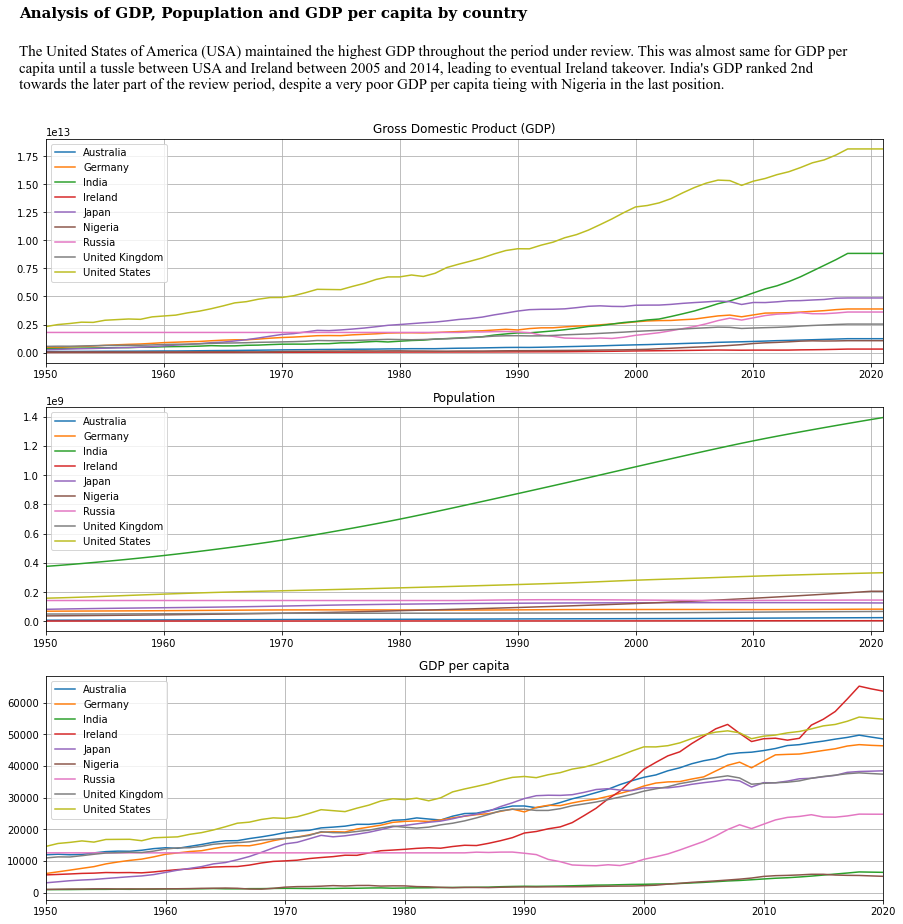

In [12]:
#The below codes attempt to visualise the gdp, population and gdp per capita of the countries in scope. Further insight is
# given below

Energy['gdp_per_capita'] = round(Energy['gdp']/Energy['population'])

Energy_gdp = Energy.groupby(['year','country'])['gdp'].sum().unstack('country')
Energy_gdp['Russia'].bfill(inplace = True)
Energy_gdp['Nigeria'].ffill(inplace = True)

Energy_population = Energy.groupby(['year','country'])['population'].sum().unstack('country')
Energy_population['Russia'].bfill(inplace = True)
Energy_population['Nigeria'].ffill(inplace = True)

Energy_population_per_mill = round(Energy_population/1000000)

Energy_gdp_per_capita = Energy.groupby(['year','country'])['gdp_per_capita'].sum().unstack('country')
Energy_gdp_per_capita['Russia'].bfill(inplace = True)
Energy_gdp_per_capita['Nigeria'].ffill(inplace = True)

fig, ax = plt.subplots(3,1)

ax[0].plot(Energy_gdp, label = Energy_gdp.columns)
ax[0].legend(loc = 'best')
ax[0].set_xlim(1950, 2021)
ax[0].grid()
ax[0].set_title('Gross Domestic Product (GDP)')

ax[1].plot(Energy_population, label = Energy_population.columns)
ax[1].legend()
ax[1].set_xlim(1950, 2021)
ax[1].grid()
ax[1].set_title('Population')

ax[2].plot(Energy_gdp_per_capita, label = Energy_gdp_per_capita.columns)
ax[2].legend()
ax[2].set_xlim(1950, 2020)
ax[2].grid()
ax[2].set_title('GDP per capita')

fig.text(0.1, 1.0, 'Analysis of GDP, Popuplation and GDP per capita by country', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.93, 
'''The United States of America (USA) maintained the highest GDP throughout the period under review. This was almost same for GDP per 
capita until a tussle between USA and Ireland between 2005 and 2014, leading to eventual Ireland takeover. India's GDP ranked 2nd 
towards the later part of the review period, despite a very poor GDP per capita tieing with Nigeria in the last position.'''
, fontsize=15, fontweight='light', fontfamily='Times New Roman')

In order to display the distribution of an item of world energy per country, please select item of interest: gas_consumption


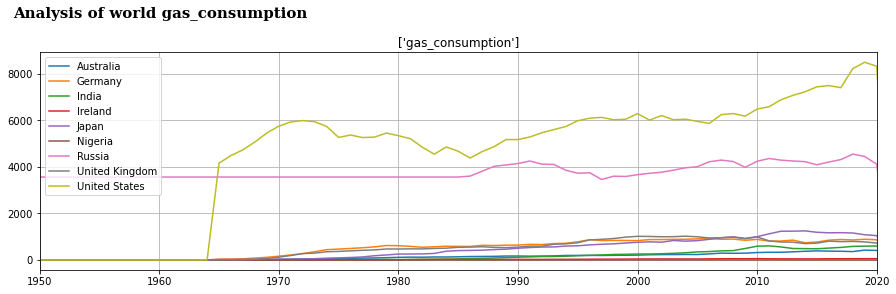

In [13]:
#This bot visualises the prompted Energy data on a global scale (within the scope of this project). Note that this can be 
# made more robust by updating the columns of interest
#This code will prompt the user to input the data of interest.

rcParams['figure.figsize'] = 15,4

Table_item = input('In order to display the distribution of an item of world energy per country, please select item of interest: ')


WEnergy = Energy.groupby(['year','country'])[Table_item].sum().unstack('country')
WEnergy['Russia'].bfill(inplace = True)
WEnergy['Nigeria'].ffill(inplace = True)

fig, ax = plt.subplots(1,1)

ax.plot(WEnergy, label = WEnergy.columns)
ax.legend(loc = 'best')
ax.set_xlim(1950, 2020)
ax.grid()

if Table_item:
    ax.set_title([Table_item])
    fig.text(0.1, 1.0, f'Analysis of world {Table_item}', fontsize=15, fontweight='bold', 
    fontfamily='serif')
    

To show country-level energy distribution, please state country of interest: United Kingdom


Text(0.5, 1.0, "United Kingdom's Energy Consumption Distribution")

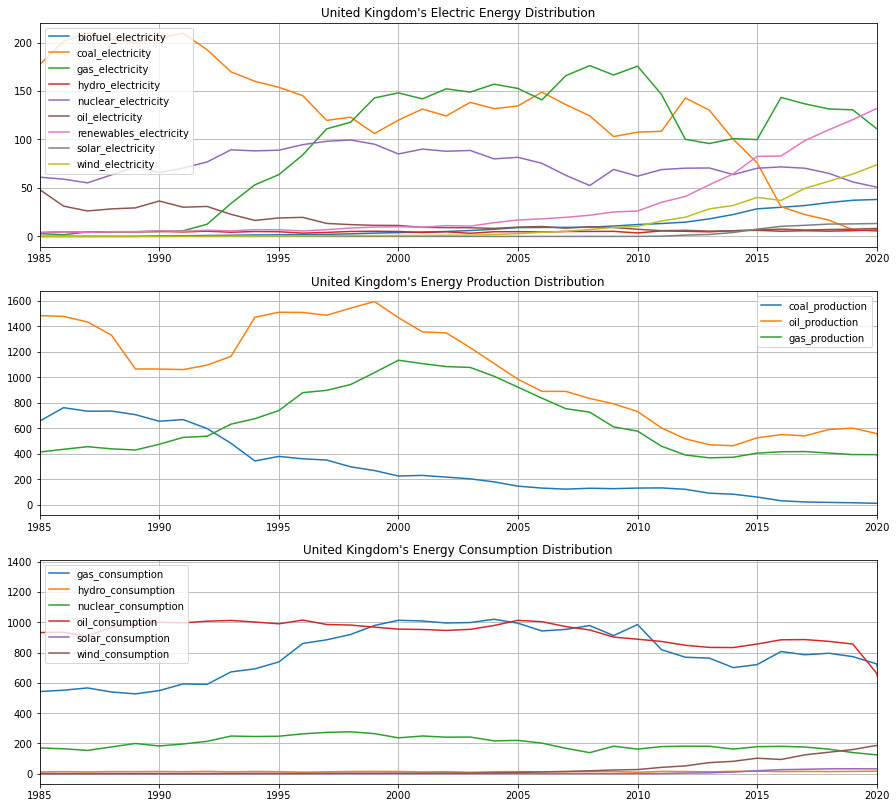

In [14]:
#This bot focuses on country-specific energy distribution per user input.
#This code will prompt the user to input the country of interest.

rcParams['figure.figsize'] = 15,14

Name_country = input('To show country-level energy distribution, please state country of interest: ')

En_Cntry = Energy[Energy['country'] == Name_country]

parse1 = ['biofuel_electricity','coal_electricity','gas_electricity','hydro_electricity','nuclear_electricity',
          'oil_electricity','renewables_electricity','solar_electricity','wind_electricity']
parse2 = ['coal_production','oil_production','gas_production']
parse3 = ['gas_consumption','hydro_consumption','nuclear_consumption','oil_consumption','solar_consumption','wind_consumption']
          
En_Cntry = En_Cntry.groupby(['year']).sum()

En_Elect = En_Cntry[parse1]
En_Prod = En_Cntry[parse2]
En_Consum = En_Cntry[parse3]

fig, ax1 = plt.subplots(3,1)

ax1[0].plot(En_Elect,label = En_Elect.columns)
ax1[0].legend(loc = 'best')
ax1[0].set_xlim(1985, 2020)
ax1[0].grid()
ax1[0].set_title(f'{Name_country}\'s Electric Energy Distribution')
          
ax1[1].plot(En_Prod, label = En_Prod.columns)
ax1[1].legend(loc = 'best')
ax1[1].set_xlim(1985, 2020)
ax1[1].grid()
ax1[1].set_title(f'{Name_country}\'s Energy Production Distribution')
          
ax1[2].plot(En_Consum, label = En_Consum.columns)
ax1[2].legend(loc = 'best')
ax1[2].set_xlim(1985, 2020)
ax1[2].grid()
ax1[2].set_title(f'{Name_country}\'s Energy Consumption Distribution')



C:\Users\X\AppData\Local\Temp/ipykernel_3776/3987433544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  En_Elect['Total_Elect'] = En_Elect[parse1].sum(axis = 1)
C:\Users\X\AppData\Local\Temp/ipykernel_3776/3987433544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  En_Prod['Total_Prod'] = En_Prod[parse2].sum(axis = 1)
C:\Users\X\AppData\Local\Temp/ipykernel_3776/3987433544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In order to view United Kingdom's two-year electricity and energy production/consumption mix, Please input first year of interest: 1987
Finally, please input second year of interest: 2020


C:\Users\X\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


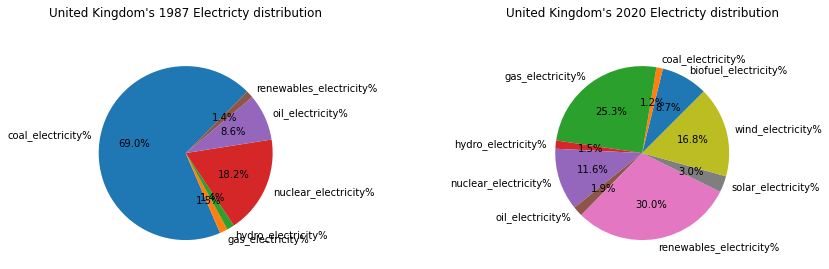

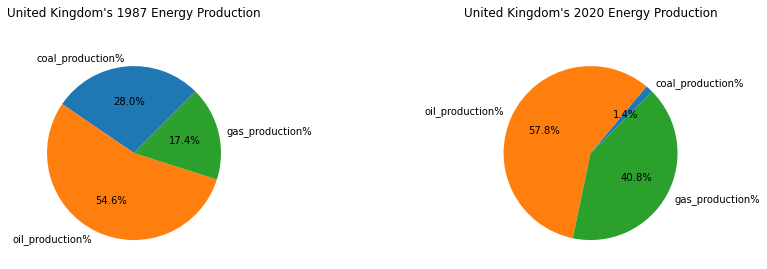

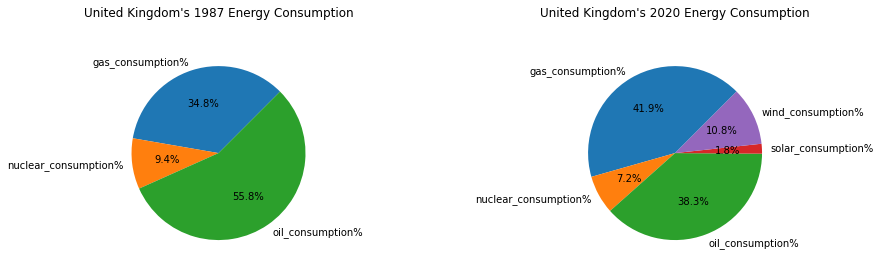

In [15]:
#This bot visualises two year electricity mix, energy production and consumption for a previously selected country in one pane
#This code will prompt the user to input the years of interest.

En_Elect['Total_Elect'] = En_Elect[parse1].sum(axis = 1)
En_Prod['Total_Prod'] = En_Prod[parse2].sum(axis = 1)
En_Consum['Total_Consum'] = En_Consum[parse3].sum(axis = 1)

parse1b = []
parse2b = []
parse3b = []

for i in parse1:
    En_Elect[f'{i}%']=round(100*(En_Elect[i]/En_Elect['Total_Elect']),4)
    parse1b.append(En_Elect[f'{i}%'])
    
for i in parse2:
    En_Prod[f'{i}%']=round(100*(En_Prod[i]/En_Prod['Total_Prod']),4)
    parse2b.append(En_Prod[f'{i}%'])
    
for i in parse3:
    En_Consum[f'{i}%']=round(100*(En_Consum[i]/En_Consum['Total_Consum']),4)
    parse3b.append(En_Consum[f'{i}%'])

En_Elect1 = pd.DataFrame(parse1b).T
En_Elect1 = En_Elect1.fillna(0)

En_Prod1 = pd.DataFrame(parse2b).T
En_Prod1 = En_Prod1.fillna(0)

En_Consum1 = pd.DataFrame(parse3b).T
En_Consum1 = En_Consum1.fillna(0)

yr1 = int(input(f'In order to view {Name_country}\'s two-year electricity and energy production/consumption mix, Please input first year of interest: '))
yr2 = int(input('Finally, please input second year of interest: '))

years = [yr1,yr2]
count = 0

figs, ax2 =  plt.subplots(1, 2, figsize=(15, 4))

for y in years:
    chart_En_pie = En_Elect1[(En_Elect1.index.values==y)]
    for i in chart_En_pie.columns:
         if chart_En_pie.iloc[0][i]<1:
            chart_En_pie.drop(columns=[i],axis=1,inplace=True)
    ax2[count].pie(chart_En_pie.iloc[0].values,labels = chart_En_pie.columns, autopct='%1.1f%%', startangle=45)
    ax2[count].set_title(f'{Name_country}\'s {int(y)} Electricty distribution', x=0.5, y=1.1)

    count = count + 1

years = [yr1,yr2]
count = 0

figs, ax2 =  plt.subplots(1, 2, figsize=(15, 4))

for y in years:
    chart_EnP_pie = En_Prod1[(En_Prod1.index.values==y)]
    for i in chart_EnP_pie.columns:
         if chart_EnP_pie.iloc[0][i]<1:
            chart_EnP_pie.drop(columns=[i],axis=1,inplace=True)
    ax2[count].pie(chart_EnP_pie.iloc[0].values,labels = chart_EnP_pie.columns, autopct='%1.1f%%', startangle=45)
    ax2[count].set_title(f'{Name_country}\'s {int(y)} Energy Production', x=0.5, y=1.1)

    count = count + 1
    
years = [yr1,yr2]
count = 0

figs, ax2 =  plt.subplots(1, 2, figsize=(15, 4))

for y in years:
    chart_EnC_pie = En_Consum1[(En_Consum1.index.values==y)]
    for i in chart_EnC_pie.columns:
         if chart_EnC_pie.iloc[0][i]<1:
            chart_EnC_pie.drop(columns=[i],axis=1,inplace=True)
    ax2[count].pie(chart_EnC_pie.iloc[0].values,labels = chart_EnC_pie.columns, autopct='%1.1f%%', startangle=45)
    ax2[count].set_title(f'{Name_country}\'s {int(y)} Energy Consumption', x=0.5, y=1.1)

    count = count + 1

In [16]:
df = pd.read_csv('World-energy-data.csv')
df.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Total Renewable Energy Consumption
ren_energy_consumption = ['iso_code','country', 'year', 'renewables_consumption','other_renewable_consumption',
                          'hydro_consumption','solar_consumption','wind_consumption']
ren_consumption = ['hydro_consumption','solar_consumption','wind_consumption','other_renewable_consumption']
ren_energy_df = df[ren_energy_consumption]

# Create dataframe for yearly energy consumption
year_range = ren_energy_df["year"].isin(range(1985,2021))
ren_energy_df = ren_energy_df[year_range]
ren_energy_bar = ren_energy_df.groupby('year')[ren_consumption].sum()
ren_energy_bar.reset_index(level=0, inplace=True)

ren_energy_bar.head()

,year,hydro_consumption,solar_consumption,wind_consumption,other_renewable_consumption
0,1985,20067.544,0.102,0.853,759.922
1,1986,20190.939,0.129,1.901,839.335
2,1987,20593.901,0.087,2.691,889.438
3,1988,21390.614,0.088,4.594,920.509
4,1989,20988.733,2.235,24.920,1009.572


<AxesSubplot:title={'center':'Global Renewable Consumption 1985 - 2020'}, xlabel='year', ylabel='Terrawatt Hour'>

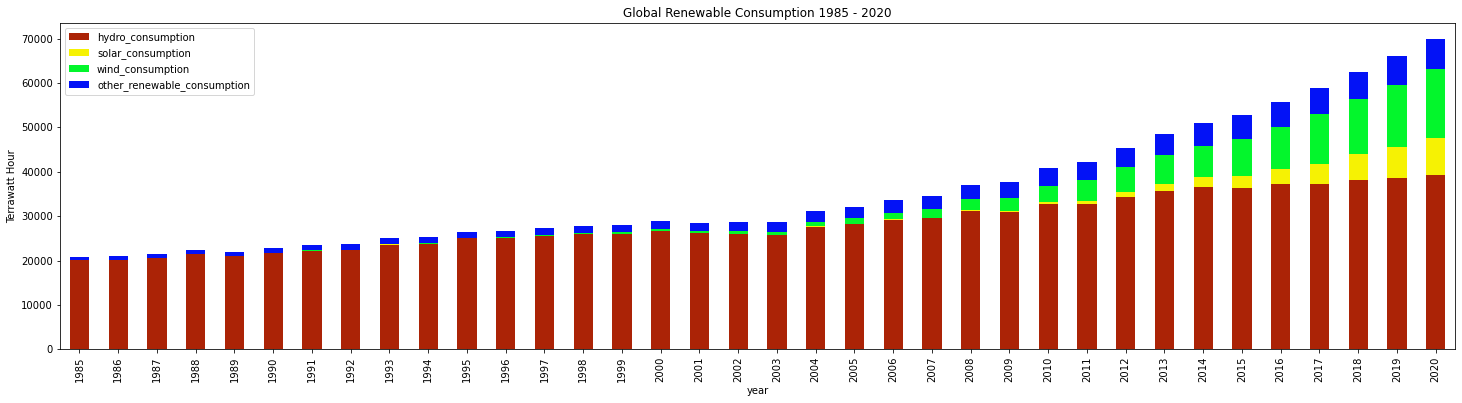

In [18]:
# Plot stacked bar chart
color_theme = ['#AB2306','#F6F203','#03F62C', '#0312F6']
ren_energy_bar.plot(x='year', ylabel='Terrawatt Hour', kind='bar',color = color_theme, stacked=True,figsize=(25,6),
        title='Global Renewable Consumption 1985 - 2020')